In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### 데이터가 폴더별로 나뉘어있지 않고 파일명에 있을때
* 문자열 처리 필요
    * os, glob 
    * replace, split, join, strip

In [2]:
os.listdir('dataset/cifar/train/')[0]

'32270_deer.png'

In [3]:
train_paths = glob.glob('dataset/cifar/train/*.png')
test_paths = glob.glob('dataset/cifar/test/*.png')
len(train_paths), len(test_paths)

(50000, 10000)

In [4]:
path = train_paths[0]
path

'dataset/cifar/train/32270_deer.png'

In [5]:
print(os.path.basename(path))
print(os.path.dirname(path))
print(os.path.exists(path))

32270_deer.png
dataset/cifar/train
True


In [6]:
fname = os.path.basename(path)
class_name = fname.replace('.png', '').split('_')[-1]
class_name

'deer'

#### def get_class_name(path)

In [7]:
def get_class_name(path):
    fname = os.path.basename(path)
    cls_name = fname.replace('.png', '').split('_')[-1]
    return cls_name

class_name = get_class_name(path)
class_name

'deer'

### Class 수 확인

In [8]:
train_class_name = []

for path in train_paths:
    class_name = get_class_name(path)
    train_class_name.append(class_name)

# List Comprehension
# classes_name = [get_class_name(path) for path in train_paths]

In [9]:
len(train_class_name)

50000

In [10]:
train_class_name[:10]

['deer',
 'cat',
 'deer',
 'truck',
 'automobile',
 'bird',
 'horse',
 'frog',
 'ship',
 'ship']

In [11]:
np.unique(train_class_name), np.unique(train_class_name).shape

(array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
        'horse', 'ship', 'truck'], dtype='<U10'),
 (10,))

In [12]:
np.unique(train_class_name, return_counts=True)

(array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
        'horse', 'ship', 'truck'], dtype='<U10'),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))

In [13]:
uniques = np.unique(train_class_name, return_counts=True)

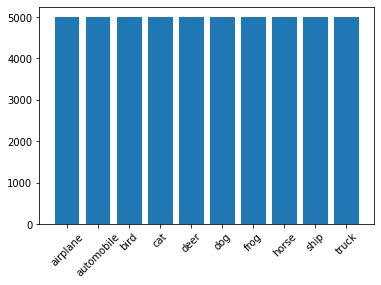

In [14]:
plt.bar(uniques[0], uniques[1])
plt.xticks(rotation=45)
plt.show()

### Create DataFrame(pandas)

#### pandas : create df example

In [15]:
data = {'a':[1, 2, 3], 'b':[10, 20, 30], 'c':[100, 200, 300]}
df = pd.DataFrame(data)
df

,a,b,c
0,1,10,100
1,2,20,200
2,3,30,300


In [16]:
len(train_paths), train_paths[0]

(50000, 'dataset/cifar/train/32270_deer.png')

In [17]:
len(train_class_name), train_class_name[0]

(50000, 'deer')

In [18]:
data = {'name': train_paths, 'class':train_class_name}
train_df = pd.DataFrame(data)

In [19]:
train_df.shape, train_df.head()

((50000, 2),
                                        name       class
 0        dataset/cifar/train/32270_deer.png        deer
 1         dataset/cifar/train/21851_cat.png         cat
 2        dataset/cifar/train/48309_deer.png        deer
 3       dataset/cifar/train/33547_truck.png       truck
 4  dataset/cifar/train/45202_automobile.png  automobile)

In [20]:
test_class_name = [get_class_name(path) for path in test_paths]

In [21]:
data = {'name':test_paths, 'class':test_class_name}

In [22]:
test_df = pd.DataFrame(data)

In [23]:
test_df.shape, test_df.head()

((10000, 2),
                                      name       class
 0         dataset/cifar/test/2598_cat.png         cat
 1       dataset/cifar/test/7195_horse.png       horse
 2        dataset/cifar/test/6171_deer.png        deer
 3       dataset/cifar/test/2586_horse.png       horse
 4  dataset/cifar/test/8372_automobile.png  automobile)

### Save DataFrame
* index=False 인경우 맨 첫번째 column에 인덱스 넘버 생성 X

In [24]:
train_csv_path = 'train_dataset.csv'
test_csv_path = 'test_dataset.csv'

train_df.to_csv(train_csv_path, index=False)
test_df.to_csv(test_csv_path, index=False)

### Data 확인

In [25]:
from PIL import Image
from tqdm import tqdm_notebook

In [26]:
heights = []
widths = []

In [27]:
path

'dataset/cifar/train/46506_deer.png'

In [28]:
img_pil = Image.open(path)
image = np.array(img_pil)
image.shape

(32, 32, 3)

In [29]:
for path in tqdm_notebook(train_paths):
    img_pil = Image.open(path)
    image = np.array(img_pil)
    h, w, c = image.shape
    heights.append(h)
    widths.append(w)

/Users/slidemorning/opt/anaconda3/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


In [30]:
np.unique(heights), np.unique(widths)

(array([32]), array([32]))

In [31]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import datasets
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [32]:
num_epochs = 1
batch_size = 32

learning_rate = 0.001
dropout_rate = 0.7
input_shape = (32, 32, 3)
num_classes = 10

In [33]:
train_df = pd.read_csv('train_dataset.csv')
test_df = pd.read_csv('test_dataset.csv')

In [34]:
train_df.head()

,name,class
0,dataset/cifar/train/32270_deer.png,deer
1,dataset/cifar/train/21851_cat.png,cat
2,dataset/cifar/train/48309_deer.png,deer
3,dataset/cifar/train/33547_truck.png,truck
4,dataset/cifar/train/45202_automobile.png,automobile


In [35]:
test_df.head()

,name,class
0,dataset/cifar/test/2598_cat.png,cat
1,dataset/cifar/test/7195_horse.png,horse
2,dataset/cifar/test/6171_deer.png,deer
3,dataset/cifar/test/2586_horse.png,horse
4,dataset/cifar/test/8372_automobile.png,automobile


In [36]:
train_data_gen = ImageDataGenerator(
    rescale=1./255.,
    width_shift_range=0.3,
    zoom_range=0.2,
    horizontal_flip=True
)

test_data_gen = ImageDataGenerator(
    rescale=1./255.
)

In [37]:
train_data_generator = train_data_gen.flow_from_dataframe(
    train_df,
    x_col='name',
    y_col='class',
    target_size=input_shape[:2],
    batch_size=batch_size
)

test_data_generator = test_data_gen.flow_from_dataframe(
    test_df,
    x_col='name',
    y_col='class',
    target_size=input_shape[:2],
    batch_size=batch_size
)

Found 50000 validated image filenames belonging to 10 classes.
Found 10000 validated image filenames belonging to 10 classes.


In [38]:
inputs = layers.Input(input_shape)
l = layers.Conv2D(32, (3, 3), padding='SAME')(inputs)
l = layers.Activation('relu')(l)
l = layers.Conv2D(32, (3, 3), padding='SAME')(l)
l = layers.Activation('relu')(l)
l = layers.MaxPool2D(pool_size=(2, 2))(l)
l = layers.Dropout(dropout_rate)(l)

l = layers.Conv2D(64, (3, 3), padding='SAME')(l)
l = layers.Activation('relu')(l)
l = layers.Conv2D(64, (3, 3), padding='SAME')(l)
l = layers.Activation('relu')(l)
l = layers.MaxPool2D(pool_size=(2, 2))(l)
l = layers.Dropout(dropout_rate)(l)

l = layers.Flatten()(l)
l = layers.Dense(512)(l)
l = layers.Activation('relu')(l)
l = layers.Dropout(dropout_rate)(l)
l = layers.Dense(num_classes)(l)
outputs = layers.Activation('softmax')(l)

model = tf.keras.Model(inputs=inputs, outputs=outputs, name='cnn-v1')

In [39]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [40]:
model.summary()

Model: "cnn-v1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0    

In [41]:
len(train_df) // 32, len(train_data_generator)

(1562, 1563)

In [42]:
len(test_df) // 32 , len(test_data_generator)

(312, 313)

In [43]:
model.fit_generator(
    train_data_generator,
    steps_per_epoch=len(train_data_generator),
    epochs=num_epochs,
    validation_data=test_data_generator,
    validation_steps=len(test_data_generator)
)

Instructions for updating:
Please use Model.fit, which supports generators.
1563/1563 [==============================] - 142s 91ms/step - loss: 1.8719 - accuracy: 0.2998 - val_loss: 1.5867 - val_accuracy: 0.4322


In [ ]:
inputs = layers.Input(input_shape)
l = layers.Conv2D(32, (3, 3), padding='SAME')(inputs)
l = layers.Activation('relu')(l)
l = layers.Conv2D(32, (3, 3), padding='SAME')(l)
l = layers.Activation('relu')(l)
l = layers.MaxPool2D(pool_size=(2, 2))(l)
l = layers.Dropout(dropout_rate)(l)

l = layers.Conv2D(64, (3, 3), padding='SAME')(l)
l = layers.Activation('relu')(l)
l = layers.Conv2D(64, (3, 3), padding='SAME')(l)
l = layers.Activation('relu')(l)
l = layers.MaxPool2D(pool_size=(2, 2))(l)
l = layers.Dropout(dropout_rate)(l)

l = layers.Flatten()(l)
l = layers.Dense(512)(l)
l = layers.Activation('relu')(l)
l = layers.Dropout(dropout_rate)(l)
l = layers.Dense(num_classes)(l)
outputs = layers.Activation('softmax')(l)

model = tf.keras.Model(inputs=inputs, outputs=outputs, name='cnn-v1')